## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
# Load Modules
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as st
from scipy.stats import norm
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
# Load ab_data.csv data and store it in the DataFrame.
# Use pandas.read_csv() function to read a comma-separated values(csv) file into DataFrame.
df = pd.read_csv('ab_data.csv')

# Use a pandas.DataFrame.head(n=5) function to return the first numbers of rows for the object based on position.
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [3]:
# Use pandas.DataFrame.shape to return a tuple representing the dimensionality of the DataFrame
df.shape

(294478, 5)

In [4]:
print('There are {} rows in the DataFrame (ab_data.csv)'.format(df.shape[0]))

There are 294478 rows in the DataFrame (ab_data.csv)


c. The number of unique users in the dataset.

In [5]:
# Use pandas.Series.unique() function to return unique values of Series object.
df['user_id'].unique()

array([851104, 804228, 661590, ..., 734608, 697314, 715931], dtype=int64)

In [6]:
# Use pandas.DataFrame.nunique(axis=0, dropna=True) function to count distinct observations over requested axis
print('There are {} number of unique users in the dataset.'.format(df['user_id'].nunique()))

There are 290584 number of unique users in the dataset.


In [7]:
# Use pandas.DataFrame.count(axis=0,level=None, numeric_only=False) function to count only non-null cells for each column or row.
df['user_id'].count()

294478

In [8]:
# Use pandas.DataFrame.size attribute to return an int representing the number of elements in this object, including the null values.
df['user_id'].size

294478

d. The proportion of users converted.

In [9]:
df['converted'].shape[0]

294478

In [10]:
# Use pandas.value_counts() function to return a Series containing the counts of unique values.
df.converted.value_counts()

0    259241
1     35237
Name: converted, dtype: int64

In [11]:
# Use pandas.value_counts(normalize=True) function to return a Series containing the relative frequencies of the unique values. 
df.converted.value_counts(normalize=True)

0    0.880341
1    0.119659
Name: converted, dtype: float64

In [12]:
print('The proportion of users converted is {}.'.format(df[df['converted']==1].shape[0] / df.shape[0]))

The proportion of users converted is 0.11965919355605512.


e. The number of times the `new_page` and `treatment` don't line up.

In [13]:
# Use pandas.value_counts() function to return a Series containing the counts of unique values.
df.group.value_counts()

treatment    147276
control      147202
Name: group, dtype: int64

In [14]:
# Use pandas.value_counts() function to return a Series containing the counts of unique values.
df.landing_page.value_counts()

old_page    147239
new_page    147239
Name: landing_page, dtype: int64

In [15]:
df_treatment_not_new_page = df.query("group=='treatment' & landing_page !='new_page'").shape[0]
df_new_page_not_treatment = df.query("landing_page=='new_page' & group !='treatment'").shape[0]
df_treatment_not_new_page, df_new_page_not_treatment 

(1965, 1928)

In [16]:
print('The number of times the new_page and treatment do not line up or do not match are {} times.'.format(df_treatment_not_new_page + df_new_page_not_treatment ))

The number of times the new_page and treatment do not line up or do not match are 3893 times.


In [17]:
df.query("landing_page == 'new_page' and group == 'control'").shape[0] + df.query("landing_page == 'old_page' and group == 'treatment'").shape[0]

3893

In [18]:
# Use pandas.crosstab() function to Compute a simple cross tabulation of two (or more) factors. 
# By default computes a frequency table of the factors unless an array of values and an aggregation function are passed.
# It will reveal 1965 entries with treatment was associated with old page and 1928 entries with new page associated with control.
pd.crosstab(df.group, df.landing_page, margins=True)

landing_page,new_page,old_page,All
group,,,
control,1928,145274,147202
treatment,145311,1965,147276
All,147239,147239,294478


f. Do any of the rows have missing values?

In [19]:
# Use pandas.DataFrame.info() to Print a concise summary of a DataFrame, including the index dtype and columns, 
# non-null values, and memory usage.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       294478 non-null  int64 
 1   timestamp     294478 non-null  object
 2   group         294478 non-null  object
 3   landing_page  294478 non-null  object
 4   converted     294478 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


In [20]:
# Use pandas.DataFrame.isnull() method to detect the Null values or missing values.
df.isnull().any()

user_id         False
timestamp       False
group           False
landing_page    False
converted       False
dtype: bool

In [21]:
# Use pandas.DataFrame.isnull() method to detect the Null values or missing values, and sum the numbers of missing values
print('The number of rows have missing value {}.'.format(sum(df.isnull().any())))

The number of rows have missing value 0.


`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

##### Remove the rows where `treatment` doesn't match with `new_page` or `control` doesn't match with `old_page` then save cleand DataFrame in to `df2`

In [22]:
drop_index = df.query("landing_page == 'new_page' and group == 'control'").index
drop_index2 = df.query("landing_page == 'old_page' and group == 'treatment'").index
total_dropindex = drop_index.append(drop_index2)
df2= df.drop(total_dropindex)

In [23]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [24]:
# Use pandas.DataFrame.nunique(axis=0, dropna=True) function to count distinct observations over requested axis
print('There are {} number of unique users in the dataset.'.format(df2['user_id'].nunique()))

There are 290584 number of unique users in the dataset.


b. There is one **user_id** repeated in **df2**.  What is it?

In [25]:
# Use pandas.DataFrame.duplicated(subset='column label', keep=False) to return boolean Series denoting duplicate rows
df2[df2.duplicated(['user_id'], keep=False)]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


c. What is the row information for the repeat **user_id**? 

In [26]:
# The row information for the repeated user_id are rows 1899 and 2893
repeated_rows = df2[df2.duplicated(['user_id'], keep=False)]
print(repeated_rows['user_id'])

1899    773192
2893    773192
Name: user_id, dtype: int64


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [27]:
# Use DataFrame.drop() function to drop (remove) specified labels from rows or column
df2.drop(labels=2893,inplace=True)

In [28]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290584 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       290584 non-null  int64 
 1   timestamp     290584 non-null  object
 2   group         290584 non-null  object
 3   landing_page  290584 non-null  object
 4   converted     290584 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 13.3+ MB


In [29]:
len(df2[df2.duplicated(['user_id'], keep=False)])

0

`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [30]:
# Use mean() function to calculate an arithmetic mean or average of data
df2['converted'].mean()

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [31]:
# Use pandas.DataFrame.groupby() function to group DataFrameusing a mapper or by a Series of columns
# With parameter (as_index=False) for aggregated output, return  object with group labels as the index.
df2.groupby(['group'],as_index=False).mean()

,group,user_id,converted
0,control,788164.072594,0.120386
1,treatment,787845.719290,0.118808


In [32]:
# Use pandas.DataFrame.query() function to query the columns of a DataFrame with a boolean expression.
# Use mean() function to calculate mean/average of a given list of numbers.
df2.query('group=="control"').converted.mean()

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [33]:
# Use pandas.DataFrame.groupby() function to group DataFrameusing a mapper or by a Series of columns
# With parameter (as_index=False) for aggregated output, return  object with group labels as the index.
df2.groupby(['group'],as_index=False).mean()

,group,user_id,converted
0,control,788164.072594,0.120386
1,treatment,787845.719290,0.118808


In [34]:
# Use pandas.DataFrame.query() function to query the columns of a DataFrame with a boolean expression.
# Use mean() function to calculate mean/average of a given list of numbers.
df2.query('group=="treatment"').converted.mean()

0.11880806551510564

d. What is the probability that an individual received the new page?

In [35]:
len(df2.query('landing_page == "new_page"'))/len(df2.landing_page)

0.5000619442226688

In [36]:
df2[df2['landing_page']=='new_page'].shape[0] / df2['landing_page'].shape[0]

0.5000619442226688

e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

**Your answer goes here.**

I think there is no sufficient evidence to conclude that the new treatment page leads to more conversions:
- Half of The population of landing page is old page and the other half is new page (0.5000619442226688) .
- The population (user_id) is on size of 290,584 users.
- The probability of control and treatment groups are 0.120386 and 0.118808 respectively.
- The proportion of users converted is 12%, however, the proportion of users not converted is 88%.
- The control group has a slightly higher conversion rate (0.1203863045004612) than the treatment group (0.11880806551510564).
- In conclusion, the probability converted of the new page 11.88% was not more than the probability of old page converted 12.04%, however, the two probabilities are close to each other.

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**Statistical Hypothesis Testing**
- A `statistical hypothesis` is a hypothesis that is testable on the basis of `observed data` modeled as the realised values taken by a collection of random variables.
- A set of data is modelled as being realised values of a collection of random variables having a joint probability distribution in some set of possible joint distributions.
- The hypothesis being tested is exactly that set of possible probability distributions.
- A `statistical hypothesis test` is a method of statistical inference.
- An `alternative hypothesis` is proposed for the probability distribution of the data, either explicitly or only informally. 
- The comparison of the two models is deemed statistically significant if, according to a threshold probability -- the significance level -- the data is very unlikely to have occurred under the `null hypothesis`.
- hypothesis test specifies which outcomes of a study may lead to a rejection of the null hypothesis at a pre-specified level of significance, while using a pre-chosen measure of deviation from that hypothesis (the test statistic, or goodness-of-fit measure). The pre-chosen level of significance is the maximal allowed "false positive rate". One wants to control the risk of incorrectly rejecting a true null hypothesis.
- The process of distinguishing between the null hypothesis and the alternative hypothesis is aided by considering two conceptual types of errors. The first type of error occurs when the null hypothesis is wrongly rejected. The second type of error occurs when the null hypothesis is wrongly not rejected. (The two types are known as type 1 and type 2 errors).
- Hypothesis tests based on statistical significance are another way of expressing confidence intervals (more precisely, confidence sets). In other words, every hypothesis test based on significance can be obtained via a confidence interval, and every confidence interval can be obtained via a hypothesis test based on significance.

In [37]:
# The Duration of this experiment
df2.timestamp.max(), df2.timestamp.min()

('2017-01-24 13:41:54.460509', '2017-01-02 13:42:05.378582')

**Setting up Hypoesis Testing**
- The **Null Hypothesis** is true before I collect data, has two groups equal or zero effect, and holds some sort of equals sign (equal, equal and more than, equal and less than).

**$$H_0$$**

- The Alternative Hypothesis is what we would like to prove to be true, and holds the opposite sign( not equal, more than, or less than).

**$$H1$$**

- Both the Null and Alternative Hypotheses should be competing and not overlapping hypothese.
- The hypothesis tests and confidence intervals tell us about parameters (the entire population), not statistics.

**Put your answer here.**
- The **Null Hypothesis**: The Conversion rate of the old_page is greater than or equal to the conversion rate of the new_page.

<h3><center>$H_0: P_{old}$ >= $P_{new}$</center></h3>

- The **Alternative Hypothesis**: The conversion rate of the old_page is less than the conversion rate of the new_page.

<h3><center>$H_1: P_{old}$ < $P_{new}$</center></h3>

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [38]:
# Under the null hypothesis, there is no difference between the conversion rate of both old page and new page.
# The old page = new page = converted rate in the ab_data.csv regardless of the page.
# However, the whole dataset (the entire population) is used to calculate the conversion rate for the new_page (P_new).
# Use mean() function to calculate an arithmetic mean or average of data.
p_new = df2['converted'].mean()
p_new

0.11959708724499628

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [39]:
# Under the null hypothesis, there is no difference between the conversion rate of both old page and new page.
# The old page = new page = converted rate in the ab_data.csv regardless of the page.
# However, the whole dataset (the entire population) is used to calculate the conversion rate for the old_page (P_old).
# Use mean() function to calculate an arithmetic mean or average of data.
p_old = df2['converted'].mean()
p_old

0.11959708724499628

c. What is $n_{new}$?

In [40]:
df2['group'].value_counts()

treatment    145310
control      145274
Name: group, dtype: int64

In [41]:
df2['landing_page'].value_counts()

new_page    145310
old_page    145274
Name: landing_page, dtype: int64

In [42]:
df2.groupby(['group','landing_page']).size()

group      landing_page
control    old_page        145274
treatment  new_page        145310
dtype: int64

In [43]:
#calculate the number of users landed and new_page
n_new = len(df2.query('landing_page == "new_page"'))
n_new

145310

In [44]:
# The number of individuals in the treatment group
n_new = len(df2.query('group == "treatment"'))
n_new

145310

d. What is $n_{old}$?

In [45]:
#calculate the number of users landed and old_page
n_old = len(df2.query('landing_page != "new_page"'))
n_old

145274

In [46]:
# The number of individuals in the control group
n_old = len(df2.query('group == "control"'))
n_old

145274

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

**Bionomial Distribution**

- Binomial Distribution is a Discrete Distribution.
- It describes the outcome of binary scenarios, e.g. toss of a coin, it will either be head or tails.
- The main difference between Normal and Bionomial Distribution is that normal distribution is continous whereas binomial is discrete, but if there are enough data points it will be quite similar to normal distribution with certain loc and scale.

In [47]:
# Use numpy.random.binomial(n,p,size=None) function to draw samples from a binomial distribution. 
# Samples are drawn from a binomial distribution with specified parameters, n trails and p probability of success,
# where n an integer >= 0 and p is in the interval [0,1]
new_page_converted = np.random.binomial(1,p_new,n_new)
new_page_converted.mean()

0.11896634780813434

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [48]:
# Use numpy.random.binomial(n,p,size=None) function to draw samples from a binomial distribution 
# Samples are drawn from a binomial distribution with specified parameters, n trails and p probability of success,
# where n an integer >= 0 and p is in the interval [0,1]
old_page_converted = np.random.binomial(1,p_old,n_old)
old_page_converted.mean()

0.11987692222971763

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [49]:
new_page_converted.mean() - old_page_converted.mean()

-0.0009105744215832934

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [50]:
# Create a sampling distribution of the difference in proportions
# run simulation 10000 times
p_diffs = []

for _ in range(10000):
    new_page_converted = np.random.binomial(1,p_new,n_new).mean()
    old_page_converted = np.random.binomial(1,p_old,n_old).mean()
    p_diffs.append(new_page_converted - old_page_converted)

In [51]:
# Convert to numpy array
p_diffs = np.array(p_diffs)

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

**Bell-shape Curve**

- A bell curve is a common type of distribution for a variable, also known as the normal distribution.
- The term "bell curve" originates from the fact that the graph used to depict a normal distribution consists of a symmetrical bell-shaped curve.
- The highest point on the curve, or the top of the bell, represents the most probable event in a series of data (its mean, mode, and median in this case), while all other possible occurrences are symmetrically distributed around the mean, creating a downward-sloping curve on each side of the peak. The width of the bell curve is described by its standard deviation.
- A bell curve is a graph depicting the normal distribution, which has a shape reminiscent of a bell.
- The top of the curve shows the mean, mode, and median of the data collected. 
- Its standard deviation depicts the bell curve's relative width around the mean.

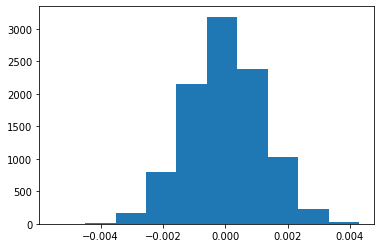

In [52]:
# Use matplotlib.pyplot.hist() to plot a historgram.
# A histogram tells you how many observations or data points fall in various ranges of values.
# Plot simulated differences between old page converted and new page converted under the null hypothesis.
plt.hist(p_diffs);

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [53]:
# Get the average conversion rate for control group
control_mean = df2.query('group == "control"')['converted'].mean()

# Get the average conversion rate for treatment group
treatment_mean = df2.query('group == "treatment"')['converted'].mean()

# Display average conversion rate for each group
control_mean, treatment_mean

(0.1203863045004612, 0.11880806551510564)

In [54]:
# Compute observed difference in conversion rate in both groups.
obs_diff = treatment_mean - control_mean

# Display observed difference
obs_diff

-0.0015782389853555567

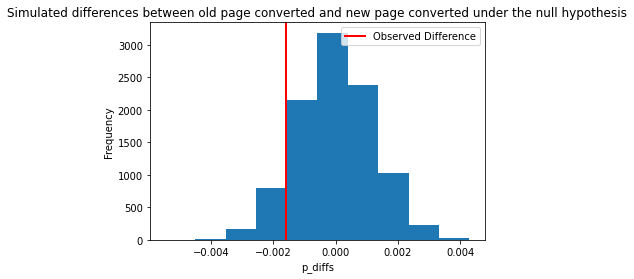

In [55]:
# plot line for observed statistic
plt.hist(p_diffs)
plt.axvline(x=obs_diff, c='red', label='Observed Difference', linewidth=2);
plt.xlabel('p_diffs')
plt.ylabel('Frequency')
plt.title('Simulated differences between old page converted and new page converted under the null hypothesis');
plt.legend()
plt.show()

**P-value**

- In statistics, the p-value is the probability of obtaining results at least as extreme as the observed results of a statistical hypothesis test, assuming that the null hypothesis is correct. 
- The p-value is used as an alternative to rejection points to provide the smallest level of significance at which the null hypothesis would be rejected. A smaller p-value means that there is stronger evidence in favor of the alternative hypothesis.
- A p-value is a measure of the probability that an observed difference could have occurred just by random chance.
- The lower the p-value, the greater the statistical significance of the observed difference.
- P-value can be used as an alternative to or in addition to pre-selected confidence levels for hypothesis testing.

**A p-value is the probability of observing your data or more extreme data, if the null is true.  Type I errors are when you choose the alternative when the null is true, and vice-versa for Type II.  Therefore, deciding an individual is guilty when they are actually innocent is a Type I error.  The alpha level is a threshold for the percent of the time you are willing to commit a Type I error.**

**I compute the p-value by finding the porportion  of values in the null distribution  that were greater than our observed difference.**

**I used this p-value to determine the statistical significance of our observed difference.**

In [56]:
# compute p value
p_value = (p_diffs > obs_diff).mean()
p_value

0.9039

In [57]:
# Check Test Result
test_result = (p_value <0.05)
test_result

False

k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**Put your answer here.**
- The portion of the p_diffs are greater than the actual difference observed in ab_data.csv by 91.11%.
- In scientific studies this value is also called p-value.
- This p-value means that we can not reject the null hypothesis, and we do not have sufficient evidence that the new page has a higher conversion rate rather than the old page. We will keep the old page.

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [58]:
# statsmodels is a Python module that provides classes and functions for the estimation of many different statistical models, 
# as well as for conducting statistical tests, and statistical data exploration.
import statsmodels.api as sm

n_new = len(df2.query('landing_page == "new_page"'))
n_old = len(df2.query('landing_page == "old_page"'))
convert_new = len(df2.query('landing_page == "new_page" & converted == 1'))
convert_old = len(df2.query('landing_page == "old_page" & converted == 1'))

In [59]:
convert_new, convert_old

(17264, 17489)

In [60]:
n_new, n_old

(145310, 145274)

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

**z-score**

- A z-score (also called a standard score) use to get an idea of how far from the mean a data point is.
- But more technically it’s a measure of how many standard deviations below or above the population mean a raw score is.
- A z-score can be placed on a normal distribution curve. 
- Z-scores range from -3 standard deviations (which would fall to the far left of the normal distribution curve) up to +3 standard deviations (which would fall to the far right of the normal distribution curve). 
- In order to use a z-score, you need to know the mean μ and also the population standard deviation σ.

In [61]:
# Use statsmodels.stats.proportion.proportions_ztest(count, nobs, value=None, alternative='two-sided', prop_var=False) function
# to test for proportions based on normal(z) test.
z_score, p_value = sm.stats.proportions_ztest([convert_old, convert_new], [n_old, n_new],value=None, alternative='smaller', prop_var=False)
z_score, p_value

(1.3109241984234394, 0.9050583127590245)

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

In [62]:
# Use scipy.stats.norm() function for a normal continous random variable.
# Use ppf(q,loc=0, scale=1) method, percent point function.
# Use Type I error rate or alpha rate .05. However, the confidence is .95.
print(norm.ppf(1-(0.05)))

1.6448536269514722


**Put your answer here.**
- The z-score with 1.31092 and p-value with 0.90505 meanshat we can not reject the null hypothesis, and we do not have sufficient evidence that the new page has a higher conversion rate rather than the old page. We can not reject the Null Hypothesis, and We keep with the old page.
- The z-score is 1.31092 is less than 1.64485, so we can not reject the null hypothesis, and we keep with the old page.
- The p-value with 90% and higher than type I error rate 5% the significance level means that we can not reject the null hypothesis, and we do not have sufficient evidence that the new page has a higher conversion rate rather than the old page.
- That means we can not be confidentwith 95% confidence level that the converted rate of the new page is larger than the old page.
- I have no evidence, with an alpha level or a type I error rate of 0.05, that the converted rate of the new page is larger than the old page.


<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Simple Linear Regression**
- In statistics, simple linear regression is a linear regression model with a single explanatory variable.
- Make a comparison of only two quantitative variables.
- The response variable, y-axis, dependent variable, or target is what you want to predict,while the explanatory variavle, x-axis, independent variable, or predictor is the variable I use to predict the response.
- A common way to visualize the relationship between two variables in linear regression is using a scatterplot.

**Multiple Linear Regression**
- In multiple linear regression,I will use both the quantitative and categorical x-variables to predict a quantitative response.
- The way that I add categorical variables into the multiple linear regression models is by using the dummy variables.
- The most common way dummy variables are added is through 1,0 encoding.
- When I add these dummy variables to the multiple linear regression models, I always drop one of the columns. The column I dropped is called the baseline.
- The coefficents I obtain from the output of the multiple linear regression models are then an indication of how the encoded levels compare to the baseline level (the dropped level).

**Logistic Regression**
- The logistic regression is used to predict categorical variable.

**Book: An Introduction to Statistical Learning, with Application in R**

By: Gareth James, Danila Witten, Trevor Hastie, Robert Tibshirani

**Chapter - 4 : Classification**

- The linear regression model assumes that the response variable Y is quantitative. But in many situations, the response variable is instead qualitative. Often qualitative variables are referred to as categorical.
- There are many possible classification techniques, or classifiers, that one might use to predict a qualitative response, which is the `logistic regression`.
    

**Put your answer here.**

 The dependent variable or response variable which I will predict is a binary variable (converted or not converted) or categorical variable. Thus, I will use a **logistic regression** model.

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

Use the [pd.get_dummies](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html) documentation to assist you with obtaining `dummy variables` for the **group** column.

**Dummy variables in Python and R vs. SAS**

- Through Python and R use the binary (1,0) encodings in the default functionality.
- However, there are many ways we might encode dummy variable, in SAS programming langauge it uses a different encoding than Python and R uses so far.
- On one hand the Python and R uses 1,0 encoding, where each category is a comparison to the baseline category. 
- On the other hand, the SAS uses 1,0,-1 encoding, where each category is a comparison to the average of all category.
- There is a key difference between the binary 1, 0 encodings, and the -1, 0, 1 encoding system: In the 1, 0 coding system, comparisons are to the baseline category, whereas in the 1, 0, -1 coding system comparisons are to the overall average.


**Fitting A Logistic Regression In Python**

Use the documentation [here](http://www.statsmodels.org/dev/regression.html) and the **statsmodels** library to fit a Logistic Regression model to predict **converted**.

In [63]:
# Change categorical variable into dummy variables in order to add them to the logistic regression models.
# Use pandas.get_dummies() method to convert the categorical variable ('group') into dummy /indicator variable

df2['intercept'] = 1

df2[['control','treatment']]= pd.get_dummies(df2['group'])
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,control,treatment
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,1,0


In [64]:
# I will drop one of the dummy variable columns in order to create linearly independent columns and a full rank matrix.
# Use control column, the dropped one as the baseline
df2 = df2.drop('control',axis = 1)
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,treatment
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0


In [65]:
# Fit Logistic Regression model and Summarize the module
# Fit a logistic regression model using the two levels of group to predict converted.

logistic_model = sm.Logit(df2['converted'],df2[['intercept','treatment']])
results = logistic_model.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290584
Method:                           MLE   Df Model:                           -1
Date:                Thu, 07 Jan 2021   Pseudo R-squ.:               8.077e-06
Time:                        20:25:02   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                       nan
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
treatment     -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

In [66]:
# Use pandas.DataFrame.rename() function to alter axes labels from 'treatment' to 'ab_page'.
df3 = df2.rename(columns={'treatment': 'ab_page'})
df3.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [67]:
# Fit Logistic Regression model and Summarize the module
# Fit a logistic regression model using the two levels of group to predict converted.
df3['intercept'] = 1

logistic_model = sm.Logit(df3['converted'],df3[['intercept','ab_page']])
results = logistic_model.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Thu, 07 Jan 2021   Pseudo R-squ.:               8.077e-06
Time:                        20:25:10   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [68]:
# Summarize the Logistic Regression module
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Thu, 07 Jan 2021   Pseudo R-squ.:               8.077e-06
Time:                        20:25:13   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

**Put your answer here.**
- The p-value associated with **ab_page** is 0.190, and it is higher than 0.05 the significance level (the type I error rate or alpha level), which means that the coefficent is not significant.
- The p-value in part II is 0.91 is different from the  p-value in part III, and both of them is higher than 0.05 the significance level.
- The p-value is very different. In part II the p-value is 0.91. This might be because the tests of the regression model (not the A/B test) assumes an intercept and because of differences in one or two-tailed testing.
- The difference is, in part II, we performed a one-sided test, where in the logistic regression part, it is two-sided test.

**Part II**
- The **Null Hypothesis**: The Conversion rate of the old_page is greater than or equal to the conversion rate of the new_page.

<h3><center>$H_0: P_{old}$ >= $P_{new}$</center></h3>

- The **Alternative Hypothesis**: The conversion rate of the old_page is less than the conversion rate of the new_page.

<h3><center>$H_1: P_{old}$ < $P_{new}$</center></h3>

    
**Part II vs. Part III**
- In part II, alternative hypothesis: the conversion rate of the old_page is less than the conversion rate of the new_page.This assumes a `one-tailed test`. 
    
- In Part III, the alternative hypothesis:
- `One-tailed test`: The landing_page type influences (positively or negatively) the conversion rate or,
- `Two-tailed test`:the conversion rate of the old_page is different to the conversion rate of the new_page.
    

in both cases, the results do not support the alternative hypothesis sufficiently. 


f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**Put your answer here.**

It is a good idea to consider other factors in order to identify other potencial influences on the conversion rate and contribute to the significance of the test result and leads to more accurate decision. However, the disadvantage is that model gets more complex. 

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [69]:
# Load Data
countries_df = pd.read_csv('countries.csv')
countries_df.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [70]:
# Use pandas.DataFrame.join() method to join columns of another DataFrame
df_new = countries_df.set_index('user_id').join(df3.set_index('user_id'), how='inner')
df_new

,country,timestamp,group,landing_page,converted,intercept,ab_page
user_id,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1
...,...,...,...,...,...,...,...
653118,US,2017-01-09 03:12:31.034796,control,old_page,0,1,0
878226,UK,2017-01-05 15:02:50.334962,control,old_page,0,1,0
799368,UK,2017-01-09 18:07:34.253935,control,old_page,0,1,0


In [71]:
# Use pandas.Series.unique() function to return unique values of Series object.
df_new.country.unique()

array(['UK', 'US', 'CA'], dtype=object)

In [72]:
# Use pandas.value_counts() function to return a Series containing the counts of unique values.
df_new['country'].value_counts()

US    203619
UK     72466
CA     14499
Name: country, dtype: int64

In [73]:
# The average of conversion rate
df_new.ab_page.mean()

0.5000619442226688

In [74]:
# The average of conversion rate grouped by country
df_new.groupby(['country'], as_index=False).mean()

,country,converted,intercept,ab_page
0,CA,0.115318,1.0,0.503552
1,UK,0.120594,1.0,0.498247
2,US,0.119547,1.0,0.500459


In [75]:
# The average of conversion rate grouped by landing_page 
df_new.groupby(['ab_page'], as_index=False).mean()

,ab_page,converted,intercept
0,0,0.120386,1.0
1,1,0.118808,1.0


In [76]:
### Create the necessary dummy variables
# Change categorical variable into dummy variables in order to add them to the logistic regression models.
# Use pandas.get_dummies() method to convert the categorical variable ('country') into dummy /indicator variable
df_new[['CA','UK', 'US']]= pd.get_dummies(df_new['country'])
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page,CA,UK,US
user_id,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0,1,0


In [77]:
### Fit Your Linear Model And Obtain the Results
# Fit Logistic Regression model and Summarize the module
df_new['intercept'] = 1

logistic_model = sm.Logit(df_new['converted'],df_new[['intercept','ab_page','CA','US']])
results = logistic_model.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Thu, 07 Jan 2021   Pseudo R-squ.:               2.323e-05
Time:                        20:25:41   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1760
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9794      0.013   -155.415      0.000      -2.004      -1.954
ab_page       -0.0149      0.011     -1.307      0.191      -0.037       0.007
CA            -0.0506      0.028     -1.784      0.074      -0.106       0.005
US            -0.0099      0.013     -0.743      0.457      -0.036       0.016
==============================================================================
"""

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [78]:
# The average of conversion rate grouped by country and landing_page.
df_new.groupby(['country','ab_page'], as_index=False).mean()

,country,ab_page,converted,intercept,CA,UK,US
0,CA,0,0.118783,1.0,1,0,0
1,CA,1,0.111902,1.0,1,0,0
2,UK,0,0.120022,1.0,0,1,0
3,UK,1,0.121171,1.0,0,1,0
4,US,0,0.120630,1.0,0,0,1
5,US,1,0.118466,1.0,0,0,1


**Higher Order Terms:**
    
- Cubic, Quadratics,Interactions, where more than one variable is attached to a coefficient.
- Interaction Term is created when multiplying two or more x-variables by one another.
- Interaction effects occur when the effect of one variable depends on the value of another variable.
- Interaction effects are common in regression analysis, ANOVA, and designed experiments.

**I will Use Interaction effect, by exploring whether the influence of the landing_page might work in the USA but not in the other countries, or Canada but not in other countries.** 


In [79]:
df_new['interaction_us_ab_page'] = df_new.US * df_new.ab_page
df_new['interaction_ca_ab_page'] = df_new.CA * df_new.ab_page

df_new.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page,CA,UK,US,interaction_us_ab_page,interaction_ca_ab_page
user_id,,,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,0,1,0,0,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,0,1,1,0
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,1,0,0,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,0,1,0,0,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0,1,0,0,0


In [80]:
# Fit Logistic Regression model and Summarize the module
df_new['intercept'] = 1

lm = sm.Logit(df_new['converted'],df_new[['intercept','ab_page','US','interaction_us_ab_page','CA','interaction_ca_ab_page']])
results = lm.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290578
Method:                           MLE   Df Model:                            5
Date:                Thu, 07 Jan 2021   Pseudo R-squ.:               3.482e-05
Time:                        20:25:55   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1920
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
intercept                 -1.9922      0.016   -123.457      0.000      -2.024      -1.961
ab_page                    0.0108      0.023      0.475      0.635      -0.034       0.056
US                         0.0057      0.019      0.306      0.760      -0.031       0.043
interaction_us_ab_page    -0.0314      0.027     -1.181      0.238      -0.084       0.021
CA                        -0.0118      0.040     -0.296      0.767      -0.090       0.066
interaction_ca_ab_page    -0.0783      0.057     -1.378      0.168      -0.190       0.033
==========================================================================================
"""

In [81]:
# Use numpy.exp() function to calculate the exponential of all elements in the input array
np.exp(results.params)

intercept                 0.136392
ab_page                   1.010893
US                        1.005761
interaction_us_ab_page    0.969090
CA                        0.988285
interaction_ca_ab_page    0.924703
dtype: float64

In [82]:
1 / np.exp(results.params)

intercept                 7.331806
ab_page                   0.989224
US                        0.994272
interaction_us_ab_page    1.031896
CA                        1.011854
interaction_ca_ab_page    1.081428
dtype: float64

### Summary and conclusion on regression

The country does not appear to have influence on the convertion rate. P-values for the two dummy country variables (CA, US) are above 0.05. 

Thus, the influence of landing_page in the US is not different to the influence of landing_page in the other countries. 

And the influence of landing_page in Canada is not different to the influence of landing_page in the other countries. 

<a id='conclusions'></a>
## Conclusions

**Based on the methods and techniques I applied such as descriptive statistics, probaility figures, A/B testing, and Regression model, all proven that:**
- We can not reject the null hypothesis.
- There is not sufficient evidence that the new_page increases the conversion rate as compared to the old_page. 
- There is no strong evidence that the countries (US, CA and UK) influence the conversion rate.

**Overall, I recommend to keep with the old page.**


<a id='conclusions'></a>
## Conclusions

Congratulations on completing the project! 

### Gather Submission Materials

Once you are satisfied with the status of your Notebook, you should save it in a format that will make it easy for others to read. You can use the __File -> Download as -> HTML (.html)__ menu to save your notebook as an .html file. If you are working locally and get an error about "No module name", then open a terminal and try installing the missing module using `pip install <module_name>` (don't include the "<" or ">" or any words following a period in the module name).

You will submit both your original Notebook and an HTML or PDF copy of the Notebook for review. There is no need for you to include any data files with your submission. If you made reference to other websites, books, and other resources to help you in solving tasks in the project, make sure that you document them. It is recommended that you either add a "Resources" section in a Markdown cell at the end of the Notebook report, or you can include a `readme.txt` file documenting your sources.

### Submit the Project

When you're ready, click on the "Submit Project" button to go to the project submission page. You can submit your files as a .zip archive or you can link to a GitHub repository containing your project files. If you go with GitHub, note that your submission will be a snapshot of the linked repository at time of submission. It is recommended that you keep each project in a separate repository to avoid any potential confusion: if a reviewer gets multiple folders representing multiple projects, there might be confusion regarding what project is to be evaluated.

It can take us up to a week to grade the project, but in most cases it is much faster. You will get an email once your submission has been reviewed. If you are having any problems submitting your project or wish to check on the status of your submission, please email us at dataanalyst-project@udacity.com. In the meantime, you should feel free to continue on with your learning journey by beginning the next module in the program.